# Installs and imports

In [100]:
# install sktime
!pip install sktime
!pip install seaborn
!pip install joblib
!pip install numba

  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/98/59/96974273437b61fd4bf5ccd36c6e80e1baa3440191e8c21521d713b28fbb/numba-0.58.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/88/31/eabea2883e23472ba17e3ff6bc29e37863c47a2e2fbab8e2dc6ae7b51d68/llvmlite-0.41.0-cp310-cp310-win_amd64.whl.metadata
Using cached numba-0.58.0-cp310-cp310-win_amd64.whl (2.6 MB)
Using cached llvmlite-0.41.0-cp310-cp310-win_amd64.whl (28.1 MB)


In [54]:
from sktime.classification.kernel_based import RocketClassifier
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os
from sklearn.metrics import accuracy_score

# Data Preprocessing

## Lior's 1st experiment

In [24]:
X_train = pd.read_csv("train_data/EDA_lior_1_results.csv")
Y_train = pd.read_csv("train_data/EDA_lior_1.csv")

In [48]:
X_train.head()

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Marker,Segment id,Unnamed: 26
0,0,0,00:00:00,2023-07-11,18:45:49,7,108.180417,2,0.0,0.741361,...,1.627440,0.333549,0,0,28.3,0.000000,28.3,NaN,0,NaN
1,1,0,00:00:01,2023-07-11,18:45:50,7,108.187102,2,0.0,1.589656,...,1.627440,0.763398,0,0,28.4,0.005137,28.4,NaN,0,NaN
2,2,0,00:00:02,2023-07-11,18:45:51,7,108.189142,2,0.0,1.539177,...,1.627440,0.203713,0,0,28.4,-0.002569,28.4,NaN,0,NaN
3,3,0,00:00:03,2023-07-11,18:45:52,7,108.184682,2,0.0,1.128682,...,1.627440,0.071002,0,0,28.4,-0.014782,28.4,NaN,0,NaN
4,4,0,00:00:04,2023-07-11,18:45:53,7,108.173580,2,0.0,0.674075,...,0.507738,0.044330,0,0,28.4,-0.041928,28.4,NaN,0,NaN


In [49]:
Y_train.head()

,Segment id,label
0,0,no
1,1,no
2,2,no
3,3,no
4,4,no


### Segment lables

In [21]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
plt.rcParams["figure.figsize"] = 16, 10

In [25]:
used_segments_labels = Y_train[6:]
used_segments_labels.head()

,Segment id,label
6,6,no
7,7,no
8,8,no
9,9,no
10,10,no


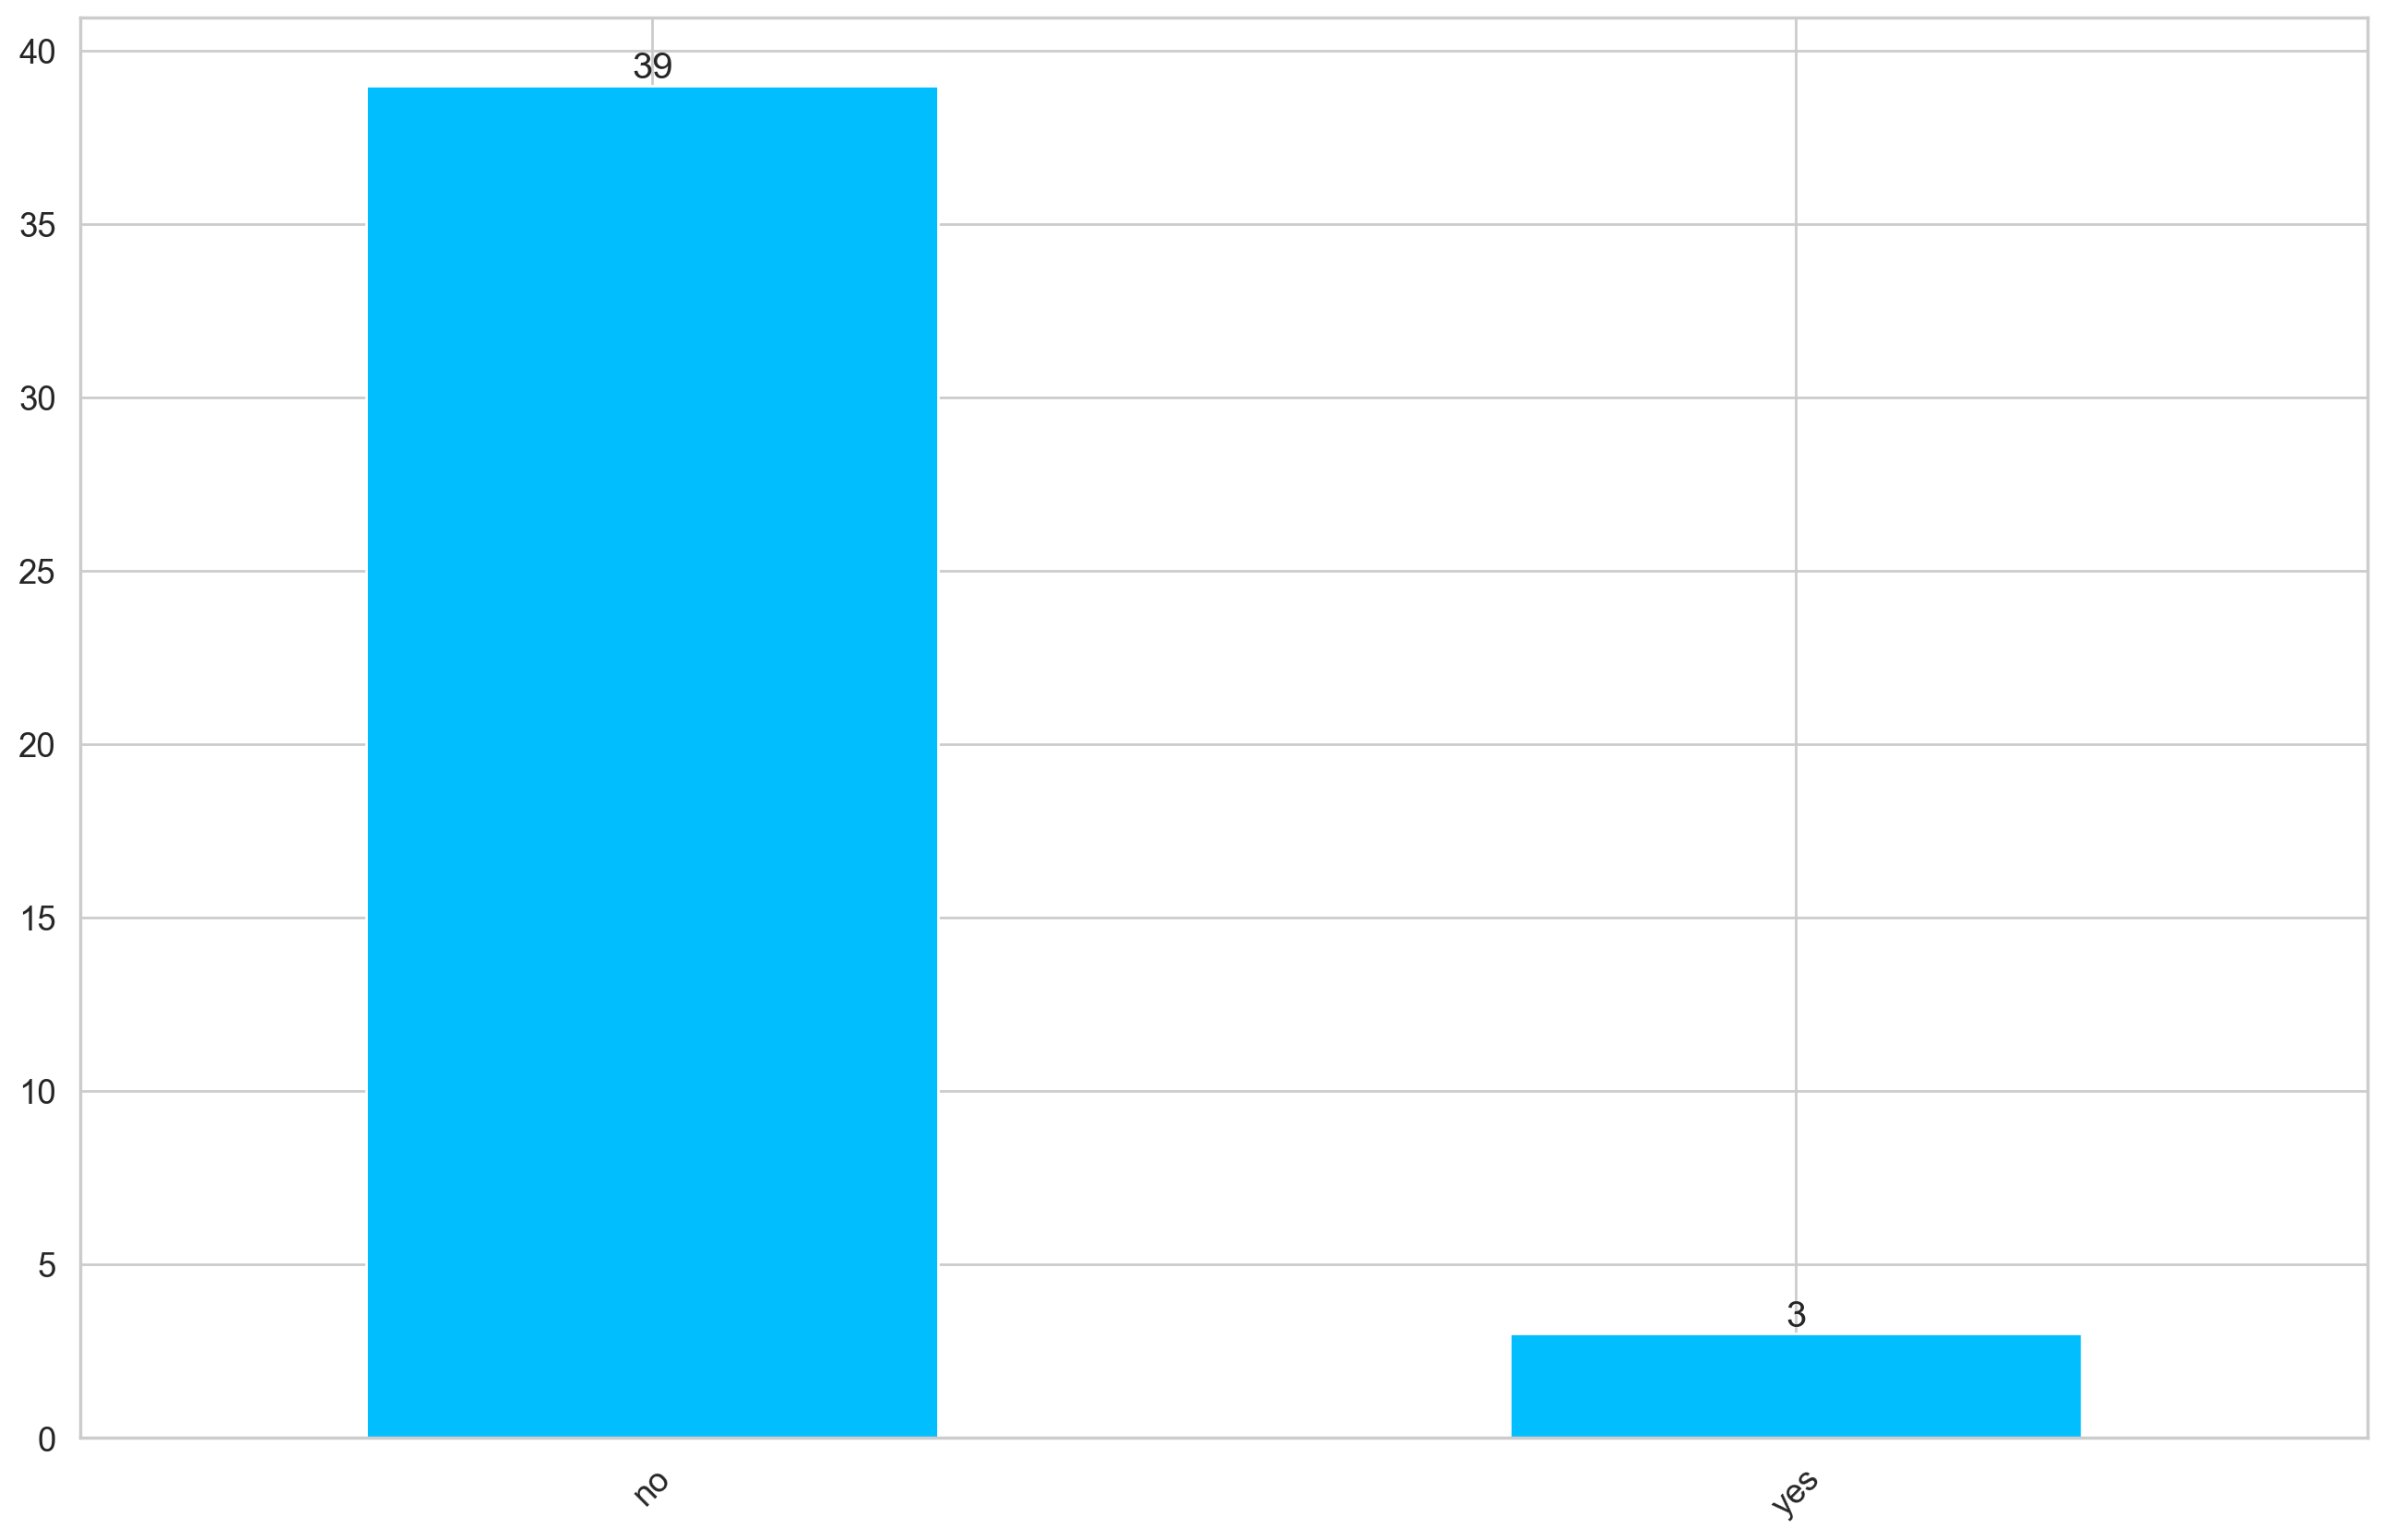

In [26]:
ay = used_segments_labels.label.value_counts().plot(kind="bar")
# Add labels to the bars
for p in ay.patches:
    ay.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

### Encoding the labels

In [9]:
label_encoder.classes_

array(['no', 'yes'], dtype=object)

In [8]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(Y_train.label)
encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0])

In [10]:
Y_train["encoded_label"] = encoded_labels

In [53]:
Y_train.head()

,Segment id,label,encoded_label
0,0,no,0
1,1,no,0
2,2,no,0
3,3,no,0
4,4,no,0


### Organaize data for training

In [67]:
FEATURE_COLUMNS = X_train.columns.tolist()[8:9]
FEATURE_COLUMNS

['EdaArousalMean []']

In [55]:
 X_train.head()

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Marker,Segment id,Unnamed: 26
0,0,0,00:00:00,2023-07-11,18:45:49,7,108.180417,2,0.0,0.741361,...,1.627440,0.333549,0,0,28.3,0.000000,28.3,NaN,0,NaN
1,1,0,00:00:01,2023-07-11,18:45:50,7,108.187102,2,0.0,1.589656,...,1.627440,0.763398,0,0,28.4,0.005137,28.4,NaN,0,NaN
2,2,0,00:00:02,2023-07-11,18:45:51,7,108.189142,2,0.0,1.539177,...,1.627440,0.203713,0,0,28.4,-0.002569,28.4,NaN,0,NaN
3,3,0,00:00:03,2023-07-11,18:45:52,7,108.184682,2,0.0,1.128682,...,1.627440,0.071002,0,0,28.4,-0.014782,28.4,NaN,0,NaN
4,4,0,00:00:04,2023-07-11,18:45:53,7,108.173580,2,0.0,0.674075,...,0.507738,0.044330,0,0,28.4,-0.041928,28.4,NaN,0,NaN


In [56]:
# Select the desired columns
selected_columns = ['Segment id', 'EdaArousalMean []', 'EdaSclMean [uS]', 'EdaScrAmplitudesMean [uS]']
df = pd.DataFrame(X_train)
X_data = df[selected_columns]
X_data.head()

,Segment id,EdaArousalMean [],EdaSclMean [uS],EdaScrAmplitudesMean [uS]
0,0,0.0,0.741361,0.0
1,0,0.0,1.589656,0.0
2,0,0.0,1.539177,0.0
3,0,0.0,1.128682,0.0
4,0,0.0,0.674075,0.0


In [75]:
# Merge the data and labels based on the 'series_id' column
merged_data = pd.merge(X_data, Y_train, on='Segment id')
merged_data

,Segment id,EdaArousalMean [],EdaSclMean [uS],EdaScrAmplitudesMean [uS],label,encoded_label
0,0,0.000000e+00,0.741361,0.000000,no,0
1,0,0.000000e+00,1.589656,0.000000,no,0
2,0,0.000000e+00,1.539177,0.000000,no,0
3,0,0.000000e+00,1.128682,0.000000,no,0
4,0,0.000000e+00,0.674075,0.000000,no,0
...,...,...,...,...,...,...
955,47,2.872370e-09,1.291220,0.000000,no,0
956,47,1.043517e-01,1.270535,0.336388,no,0
957,47,3.047191e-01,1.243577,0.000000,no,0
958,47,2.377635e-01,1.253299,0.000000,no,0


In [76]:
# Remove all the data before experiment start
merged_data_start = merged_data[120:]
merged_data_start

,Segment id,EdaArousalMean [],EdaSclMean [uS],EdaScrAmplitudesMean [uS],label,encoded_label
120,6,7.326261e-01,6.388704,0.000000,no,0
121,6,5.705698e-01,6.687354,0.000000,no,0
122,6,4.443602e-01,6.989779,0.000000,no,0
123,6,3.460681e-01,7.145787,0.000000,no,0
124,6,2.695181e-01,7.146281,0.000000,no,0
...,...,...,...,...,...,...
955,47,2.872370e-09,1.291220,0.000000,no,0
956,47,1.043517e-01,1.270535,0.336388,no,0
957,47,3.047191e-01,1.243577,0.000000,no,0
958,47,2.377635e-01,1.253299,0.000000,no,0


In [106]:
# Extract the measuremens columns as time series data
X_custom = merged_data_start.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_custom

array([list([0.732626147, 0.570569817, 0.44436022, 0.346068088, 0.269518098, 0.209900905, 0.177399313, 0.405005437, 0.750036689, 0.955810487, 0.744385956, 0.579728365, 0.451492905, 0.351623028, 0.273844289, 0.213270147, 0.166094957, 0.129354883, 0.100741684, 0.078457702]),
       list([0.06110292, 0.163063374, 1.135031661, 0.980113315, 0.764270813, 0.595214708, 0.463553681, 0.361015969, 0.28115952, 0.218967254, 0.170531869, 0.132810353, 0.103432807, 0.080553551, 0.062735169, 0.048858198, 0.038050803, 0.029633995, 0.023078979, 0.017973927]),
       list([0.013998108, 0.010901738, 0.008490282, 0.006612238, 0.005149616, 0.004010525, 0.0031234, 0.002432506, 0.001894438, 0.00147539, 0.001149035, 0.000894869, 0.000696925, 0.000542766, 0.000422706, 0.000329204, 0.000256384, 0.000199672, 0.000155505, 0.000121107]),
       list([9.43185e-05, 7.34553e-05, 5.72071e-05, 4.45529e-05, 3.46978e-05, 2.70227e-05, 2.10453e-05, 1.63901e-05, 1.27646e-05, 9.9411e-06, 7.74213e-06, 6.02958e-06, 4.69584e-06, 

In [11]:
# Extract the 'label' column as labels
Y_custom = Y_train["encoded_label"].values
Y_custom = Y_custom[6:]
Y_custom

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [109]:
# Convert X_custom to a 2D NumPy array
X_custom_np = np.vstack(X_custom)
X_custom_np

array([[7.32626147e-01, 5.70569817e-01, 4.44360220e-01, 3.46068088e-01,
        2.69518098e-01, 2.09900905e-01, 1.77399313e-01, 4.05005437e-01,
        7.50036689e-01, 9.55810487e-01, 7.44385956e-01, 5.79728365e-01,
        4.51492905e-01, 3.51623028e-01, 2.73844289e-01, 2.13270147e-01,
        1.66094957e-01, 1.29354883e-01, 1.00741684e-01, 7.84577020e-02],
       [6.11029200e-02, 1.63063374e-01, 1.13503166e+00, 9.80113315e-01,
        7.64270813e-01, 5.95214708e-01, 4.63553681e-01, 3.61015969e-01,
        2.81159520e-01, 2.18967254e-01, 1.70531869e-01, 1.32810353e-01,
        1.03432807e-01, 8.05535510e-02, 6.27351690e-02, 4.88581980e-02,
        3.80508030e-02, 2.96339950e-02, 2.30789790e-02, 1.79739270e-02],
       [1.39981080e-02, 1.09017380e-02, 8.49028200e-03, 6.61223800e-03,
        5.14961600e-03, 4.01052500e-03, 3.12340000e-03, 2.43250600e-03,
        1.89443800e-03, 1.47539000e-03, 1.14903500e-03, 8.94869000e-04,
        6.96925000e-04, 5.42766000e-04, 4.22706000e-04, 3.2920

## Lior's 2nd experiment

In [75]:
X_train1 = pd.read_csv("train_data/EDA_lior_2_results.csv")
X_train1 = X_train1[100:960]
X_train1.head()

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Marker,Segment id,Unnamed: 26
100,100,0,00:01:40,2023-07-11,19:14:34,0.0,109.181945,0,0.219539,6.287830,...,97.602633,0.177910,0.0,0.0,29.4,-0.036872,29.4,NaN,5.0,NaN
101,101,0,00:01:41,2023-07-11,19:14:35,0.0,109.018117,0,0.172122,6.368778,...,97.602633,0.346009,0.0,0.0,29.4,-0.034635,29.4,NaN,5.0,NaN
102,102,0,00:01:42,2023-07-11,19:14:36,0.0,108.845850,0,0.134049,6.449124,...,97.602633,0.163379,0.0,0.0,29.4,-0.030700,29.4,NaN,5.0,NaN
103,103,0,00:01:43,2023-07-11,19:14:37,0.0,108.709690,0,0.104397,6.496478,...,97.602633,0.200110,0.0,0.0,29.5,-0.024966,29.5,NaN,5.0,NaN
104,104,0,00:01:44,2023-07-11,19:14:38,0.0,108.624707,0,0.081305,6.510152,...,110.920292,0.058747,0.0,0.0,29.5,-0.018029,29.5,NaN,5.0,NaN


In [66]:
Y_train1 = pd.read_csv("train_data/EDA_lior_2.csv")
Y_train1 = Y_train1[5:]
Y_train1

,Segment id,label
5,5,no
6,6,no
7,7,no
8,8,no
9,9,no
10,10,no
11,11,no
12,12,no
13,13,no
14,14,yes


In [76]:
# Select the desired columns
selected_columns1 = ['Segment id', 'EdaArousalMean []']
df1 = pd.DataFrame(X_train1)
X_data1 = df1[selected_columns1]
X_data1

,Segment id,EdaArousalMean []
100,5.0,0.219539
101,5.0,0.172122
102,5.0,0.134049
103,5.0,0.104397
104,5.0,0.081305
...,...,...
955,47.0,0.002364
956,47.0,0.001841
957,47.0,0.001434
958,47.0,0.001117


### Segment lables

In [77]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
plt.rcParams["figure.figsize"] = 16, 10

In [81]:
used_segments_labels1 = Y_train1
used_segments_labels1.head()

,Segment id,label
5,5,no
6,6,no
7,7,no
8,8,no
9,9,no


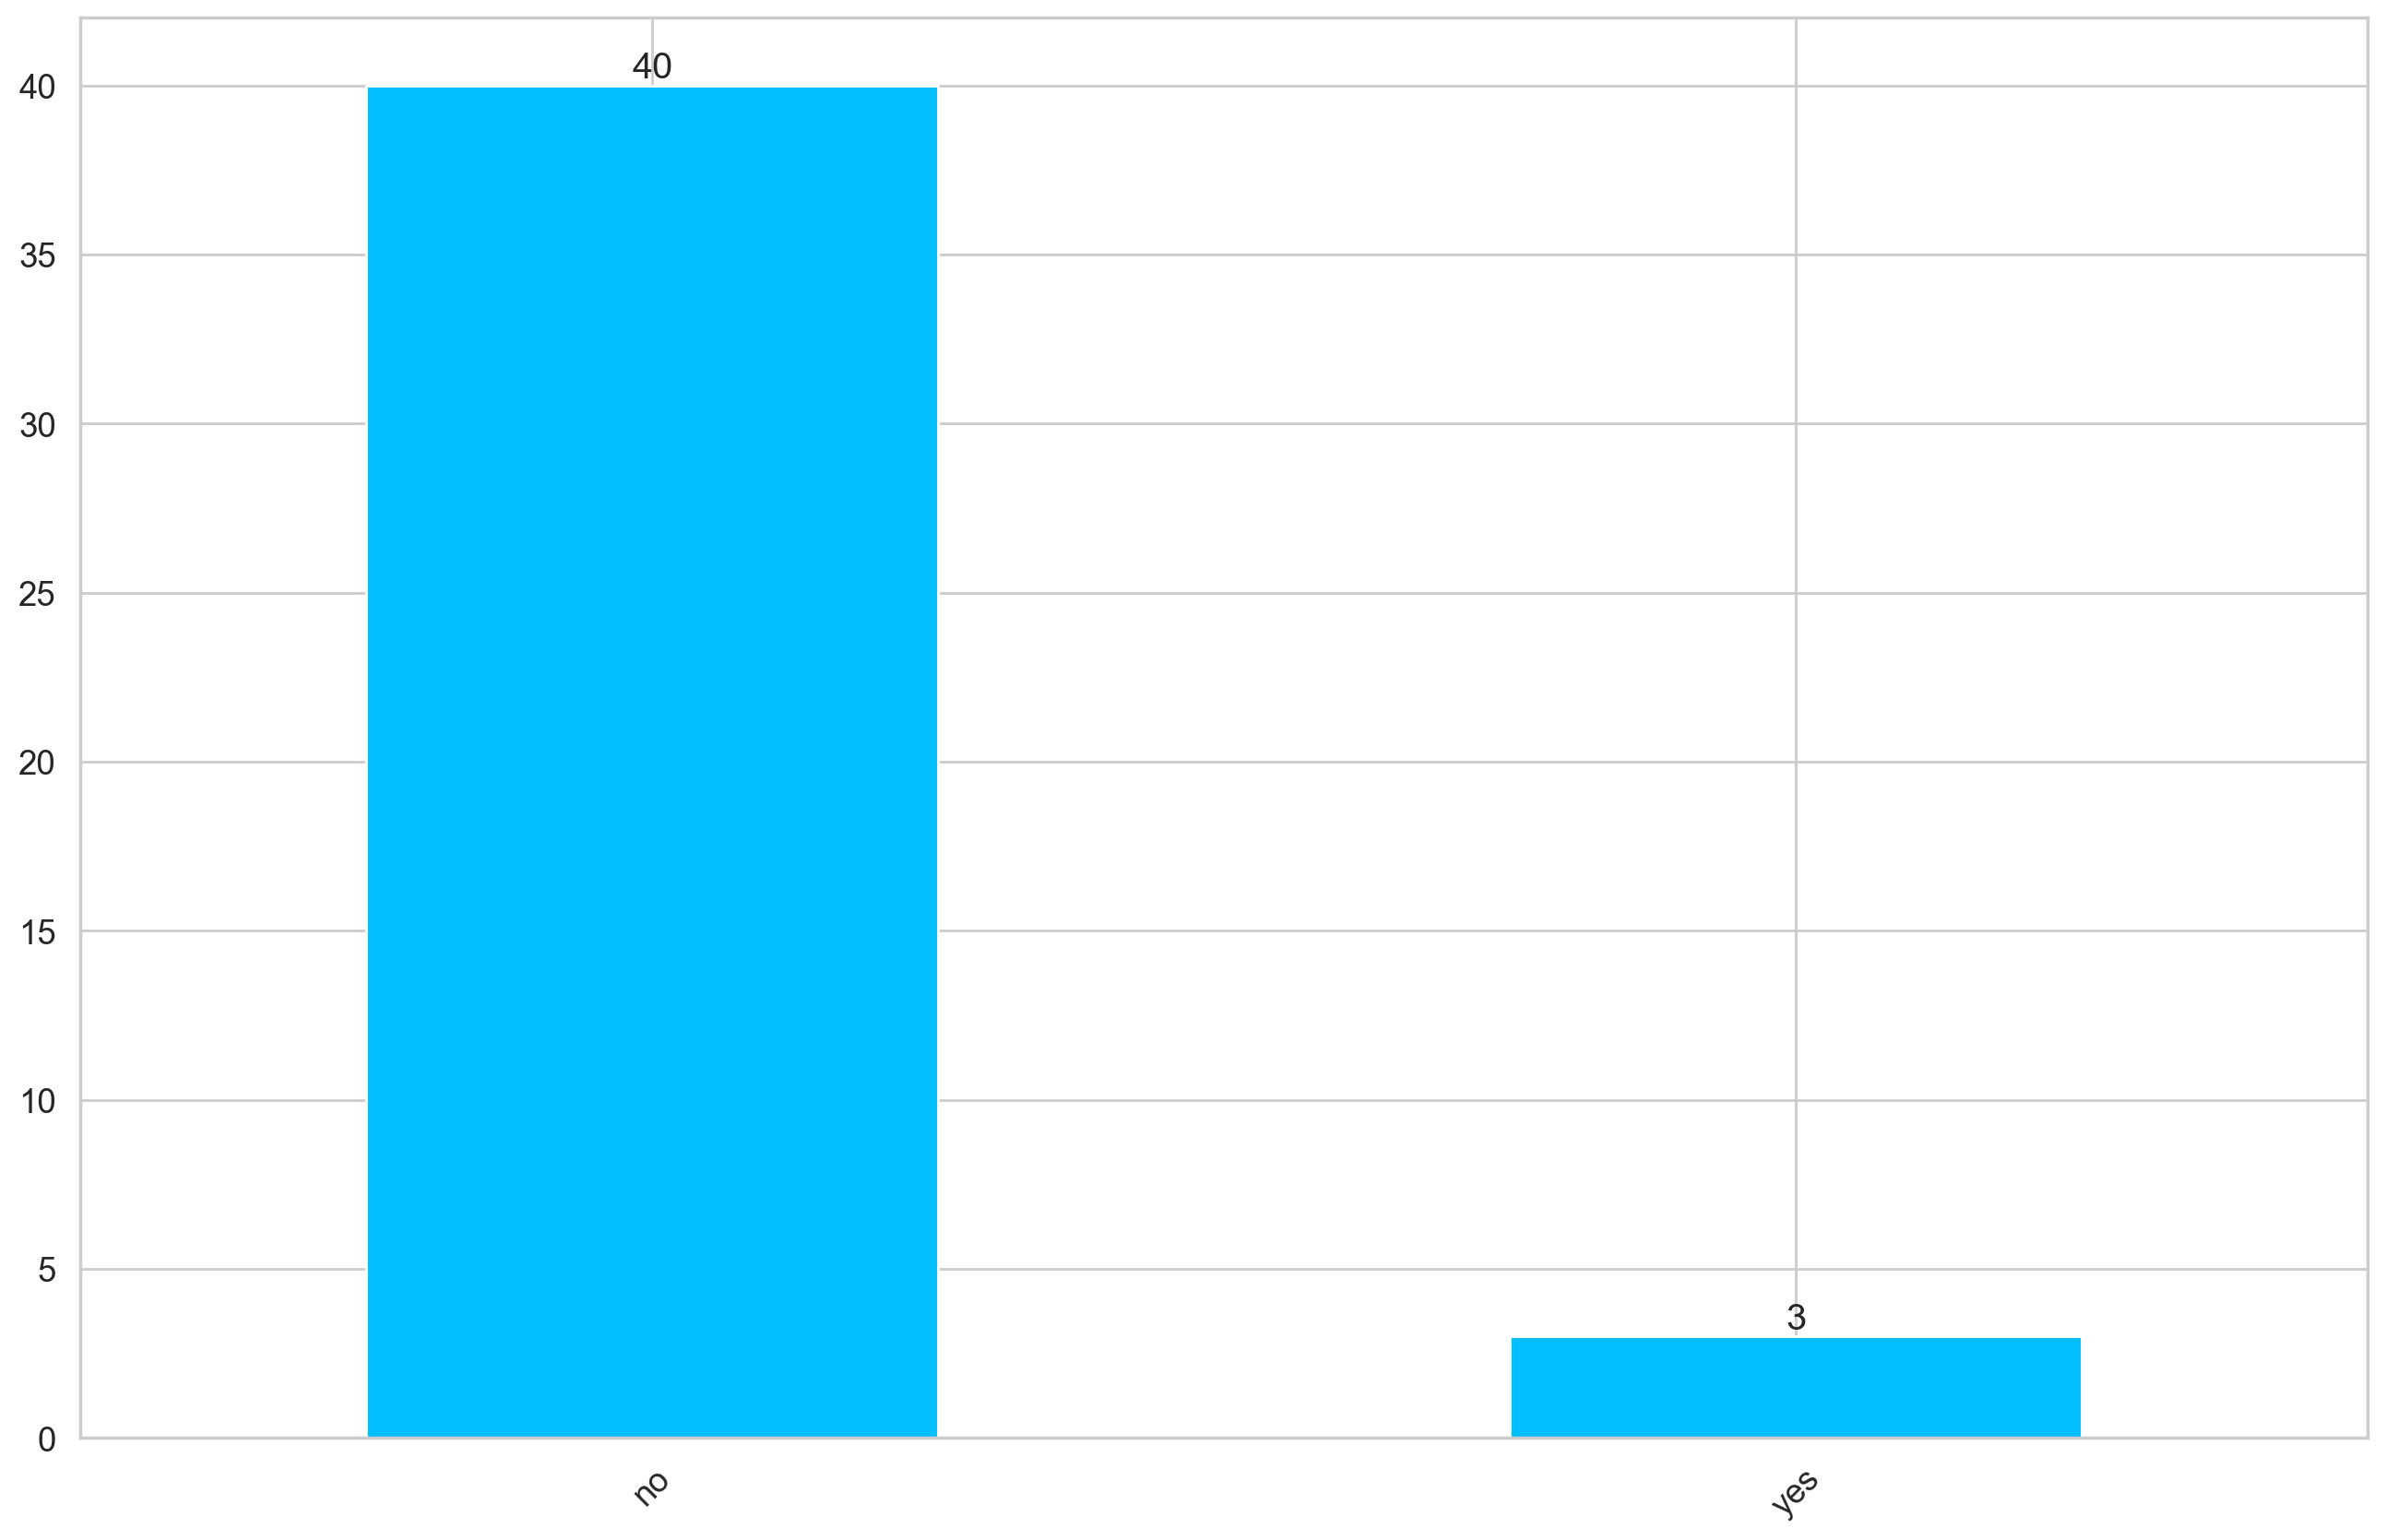

In [83]:
ay1 = used_segments_labels1.label.value_counts().plot(kind="bar")
# Add labels to the bars
for p in ay1.patches:
    ay1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

### Encoding the labels

In [86]:
encoded_labels1 = label_encoder.fit_transform(Y_train1.label)
encoded_labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [88]:
Y_train1["encoded_label"] = encoded_labels1
Y_train1

,Segment id,label,encoded_label
5,5,no,0
6,6,no,0
7,7,no,0
8,8,no,0
9,9,no,0
10,10,no,0
11,11,no,0
12,12,no,0
13,13,no,0
14,14,yes,1


### Organaize data for training

In [90]:
# Merge the data and labels based on the 'series_id' column
merged_data1 = pd.merge(X_data1, Y_train1, on='Segment id')
merged_data1

,Segment id,EdaArousalMean [],label,encoded_label
0,5.0,0.219539,no,0
1,5.0,0.172122,no,0
2,5.0,0.134049,no,0
3,5.0,0.104397,no,0
4,5.0,0.081305,no,0
...,...,...,...,...
855,47.0,0.002364,no,0
856,47.0,0.001841,no,0
857,47.0,0.001434,no,0
858,47.0,0.001117,no,0


In [91]:
# Extract the measuremens columns as time series data
X_custom1 = merged_data1.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_custom1

array([list([0.219538958, 0.172122288, 0.134048973, 0.104397445, 0.081304812, 0.063320251, 0.049313861, 0.038405674, 0.029910369, 0.023294219, 0.018141556, 0.014128658, 0.01100341, 0.008569464, 0.006673905, 0.005197643, 0.004047928, 0.00315253, 0.002455193, 0.001912106]),
       list([0.00148915, 0.001159751, 0.000903215, 0.000703424, 0.000547828, 0.000426648, 0.000332274, 0.000258775, 0.000201534, 0.000156955, 0.000122237, 9.51981e-05, 7.41404e-05, 5.77406e-05, 0.37831646, 0.352290196, 0.27436388, 0.213674805, 0.166410105, 0.12960032]),
       list([0.100932831, 0.078606568, 0.061218857, 0.047677293, 0.037131113, 0.02891774, 0.022521159, 0.017539496, 0.013659773, 0.010638242, 0.008285071, 0.00645242, 0.00502515, 0.003913591, 0.003047907, 0.002373713, 0.001848649, 0.00143973, 0.001121262, 0.00087324]),
       list([0.00068008, 0.000529647, 0.000412489, 0.000321247, 0.000250187, 0.000194846, 0.000151746, 0.00011818, 9.20388e-05, 7.16799e-05, 5.58244e-05, 4.34761e-05, 3.38592e-05, 2.6369

In [94]:
# Extract the 'label' column as labels
Y_custom1 = Y_train1["encoded_label"].values
Y_custom1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
# Convert X_custom to a 2D NumPy array
X_custom_np1 = np.vstack(X_custom1)
X_custom_np1

array([[2.19538958e-01, 1.72122288e-01, 1.34048973e-01, 1.04397445e-01,
        8.13048120e-02, 6.33202510e-02, 4.93138610e-02, 3.84056740e-02,
        2.99103690e-02, 2.32942190e-02, 1.81415560e-02, 1.41286580e-02,
        1.10034100e-02, 8.56946400e-03, 6.67390500e-03, 5.19764300e-03,
        4.04792800e-03, 3.15253000e-03, 2.45519300e-03, 1.91210600e-03],
       [1.48915000e-03, 1.15975100e-03, 9.03215000e-04, 7.03424000e-04,
        5.47828000e-04, 4.26648000e-04, 3.32274000e-04, 2.58775000e-04,
        2.01534000e-04, 1.56955000e-04, 1.22237000e-04, 9.51981000e-05,
        7.41404000e-05, 5.77406000e-05, 3.78316460e-01, 3.52290196e-01,
        2.74363880e-01, 2.13674805e-01, 1.66410105e-01, 1.29600320e-01],
       [1.00932831e-01, 7.86065680e-02, 6.12188570e-02, 4.76772930e-02,
        3.71311130e-02, 2.89177400e-02, 2.25211590e-02, 1.75394960e-02,
        1.36597730e-02, 1.06382420e-02, 8.28507100e-03, 6.45242000e-03,
        5.02515000e-03, 3.91359100e-03, 3.04790700e-03, 2.3737

## Vlad's 1st experiment

In [120]:
X_train2 = pd.read_csv("train_data/EDA_vlad_1_results.csv")
# Take segments id 19 to 58
X_train2 = X_train2[380:1180]
X_train2

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Markers,Segment id,Unnamed: 26
380,380,0,00:06:20,2023-07-11,16:56:57,2.0,97.714295,5.0,2.315570e-02,8.349160,...,42.645281,0.004673,0.0,0.0,29.0,-0.006225,29.0,NaN,19.0,NaN
381,381,0,00:06:21,2023-07-11,16:56:58,2.0,97.702249,5.0,1.803368e-02,8.298571,...,42.645281,0.004744,0.0,0.0,29.0,-0.006348,29.0,NaN,19.0,NaN
382,382,0,00:06:22,2023-07-11,16:56:59,2.0,97.684459,5.0,1.404464e-02,8.253473,...,42.645281,0.003056,0.0,0.0,29.0,-0.006390,29.0,NaN,19.0,NaN
383,383,0,00:06:23,2023-07-11,16:57:00,2.0,97.664046,5.0,1.093798e-02,8.215360,...,42.645281,0.003090,0.0,0.0,29.0,-0.006052,29.0,NaN,19.0,NaN
384,384,0,00:06:24,2023-07-11,16:57:01,2.0,97.645544,5.0,8.518505e-03,8.187131,...,42.405239,0.005561,0.0,0.0,29.0,-0.005315,29.0,NaN,19.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,1175,0,00:19:35,2023-07-11,17:10:12,1.0,99.016731,1.0,7.216300e-16,4.513154,...,85.944887,0.004095,0.0,0.0,29.4,0.035207,29.4,NaN,58.0,NaN
1176,1176,0,00:19:36,2023-07-11,17:10:13,7.0,99.045522,1.0,5.620060e-16,4.512908,...,85.753281,0.003471,0.0,0.0,29.4,0.035628,29.4,NaN,58.0,NaN
1177,1177,0,00:19:37,2023-07-11,17:10:14,7.0,99.092540,1.0,4.376910e-16,4.512259,...,85.753281,0.003090,0.0,0.0,29.4,0.035448,29.4,NaN,58.0,NaN
1178,1178,0,00:19:38,2023-07-11,17:10:15,7.0,99.157696,1.0,3.408740e-16,4.513837,...,85.753281,0.003929,0.0,0.0,29.4,0.035074,29.4,NaN,58.0,NaN


In [135]:
Y_train2 = pd.read_csv("train_data/EDA_vlad_1.csv")
# Take segments id 19 to 58
Y_train2 = Y_train2[19:59]
Y_train2

,Segment id,label
19,19,no
20,20,no
21,21,no
22,22,no
23,23,no
24,24,no
25,25,no
26,26,no
27,27,no
28,28,no


In [136]:
# Select the desired columns
selected_columns2 = ['Segment id', 'EdaArousalMean []']
df2 = pd.DataFrame(X_train2)
X_data2 = df2[selected_columns1]
X_data2

,Segment id,EdaArousalMean []
380,19.0,2.315570e-02
381,19.0,1.803368e-02
382,19.0,1.404464e-02
383,19.0,1.093798e-02
384,19.0,8.518505e-03
...,...,...
1175,58.0,7.216300e-16
1176,58.0,5.620060e-16
1177,58.0,4.376910e-16
1178,58.0,3.408740e-16


### Segment lables

In [129]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
plt.rcParams["figure.figsize"] = 16, 10

In [139]:
used_segments_labels2 = Y_train2
used_segments_labels2.head()

,Segment id,label
19,19,no
20,20,no
21,21,no
22,22,no
23,23,no


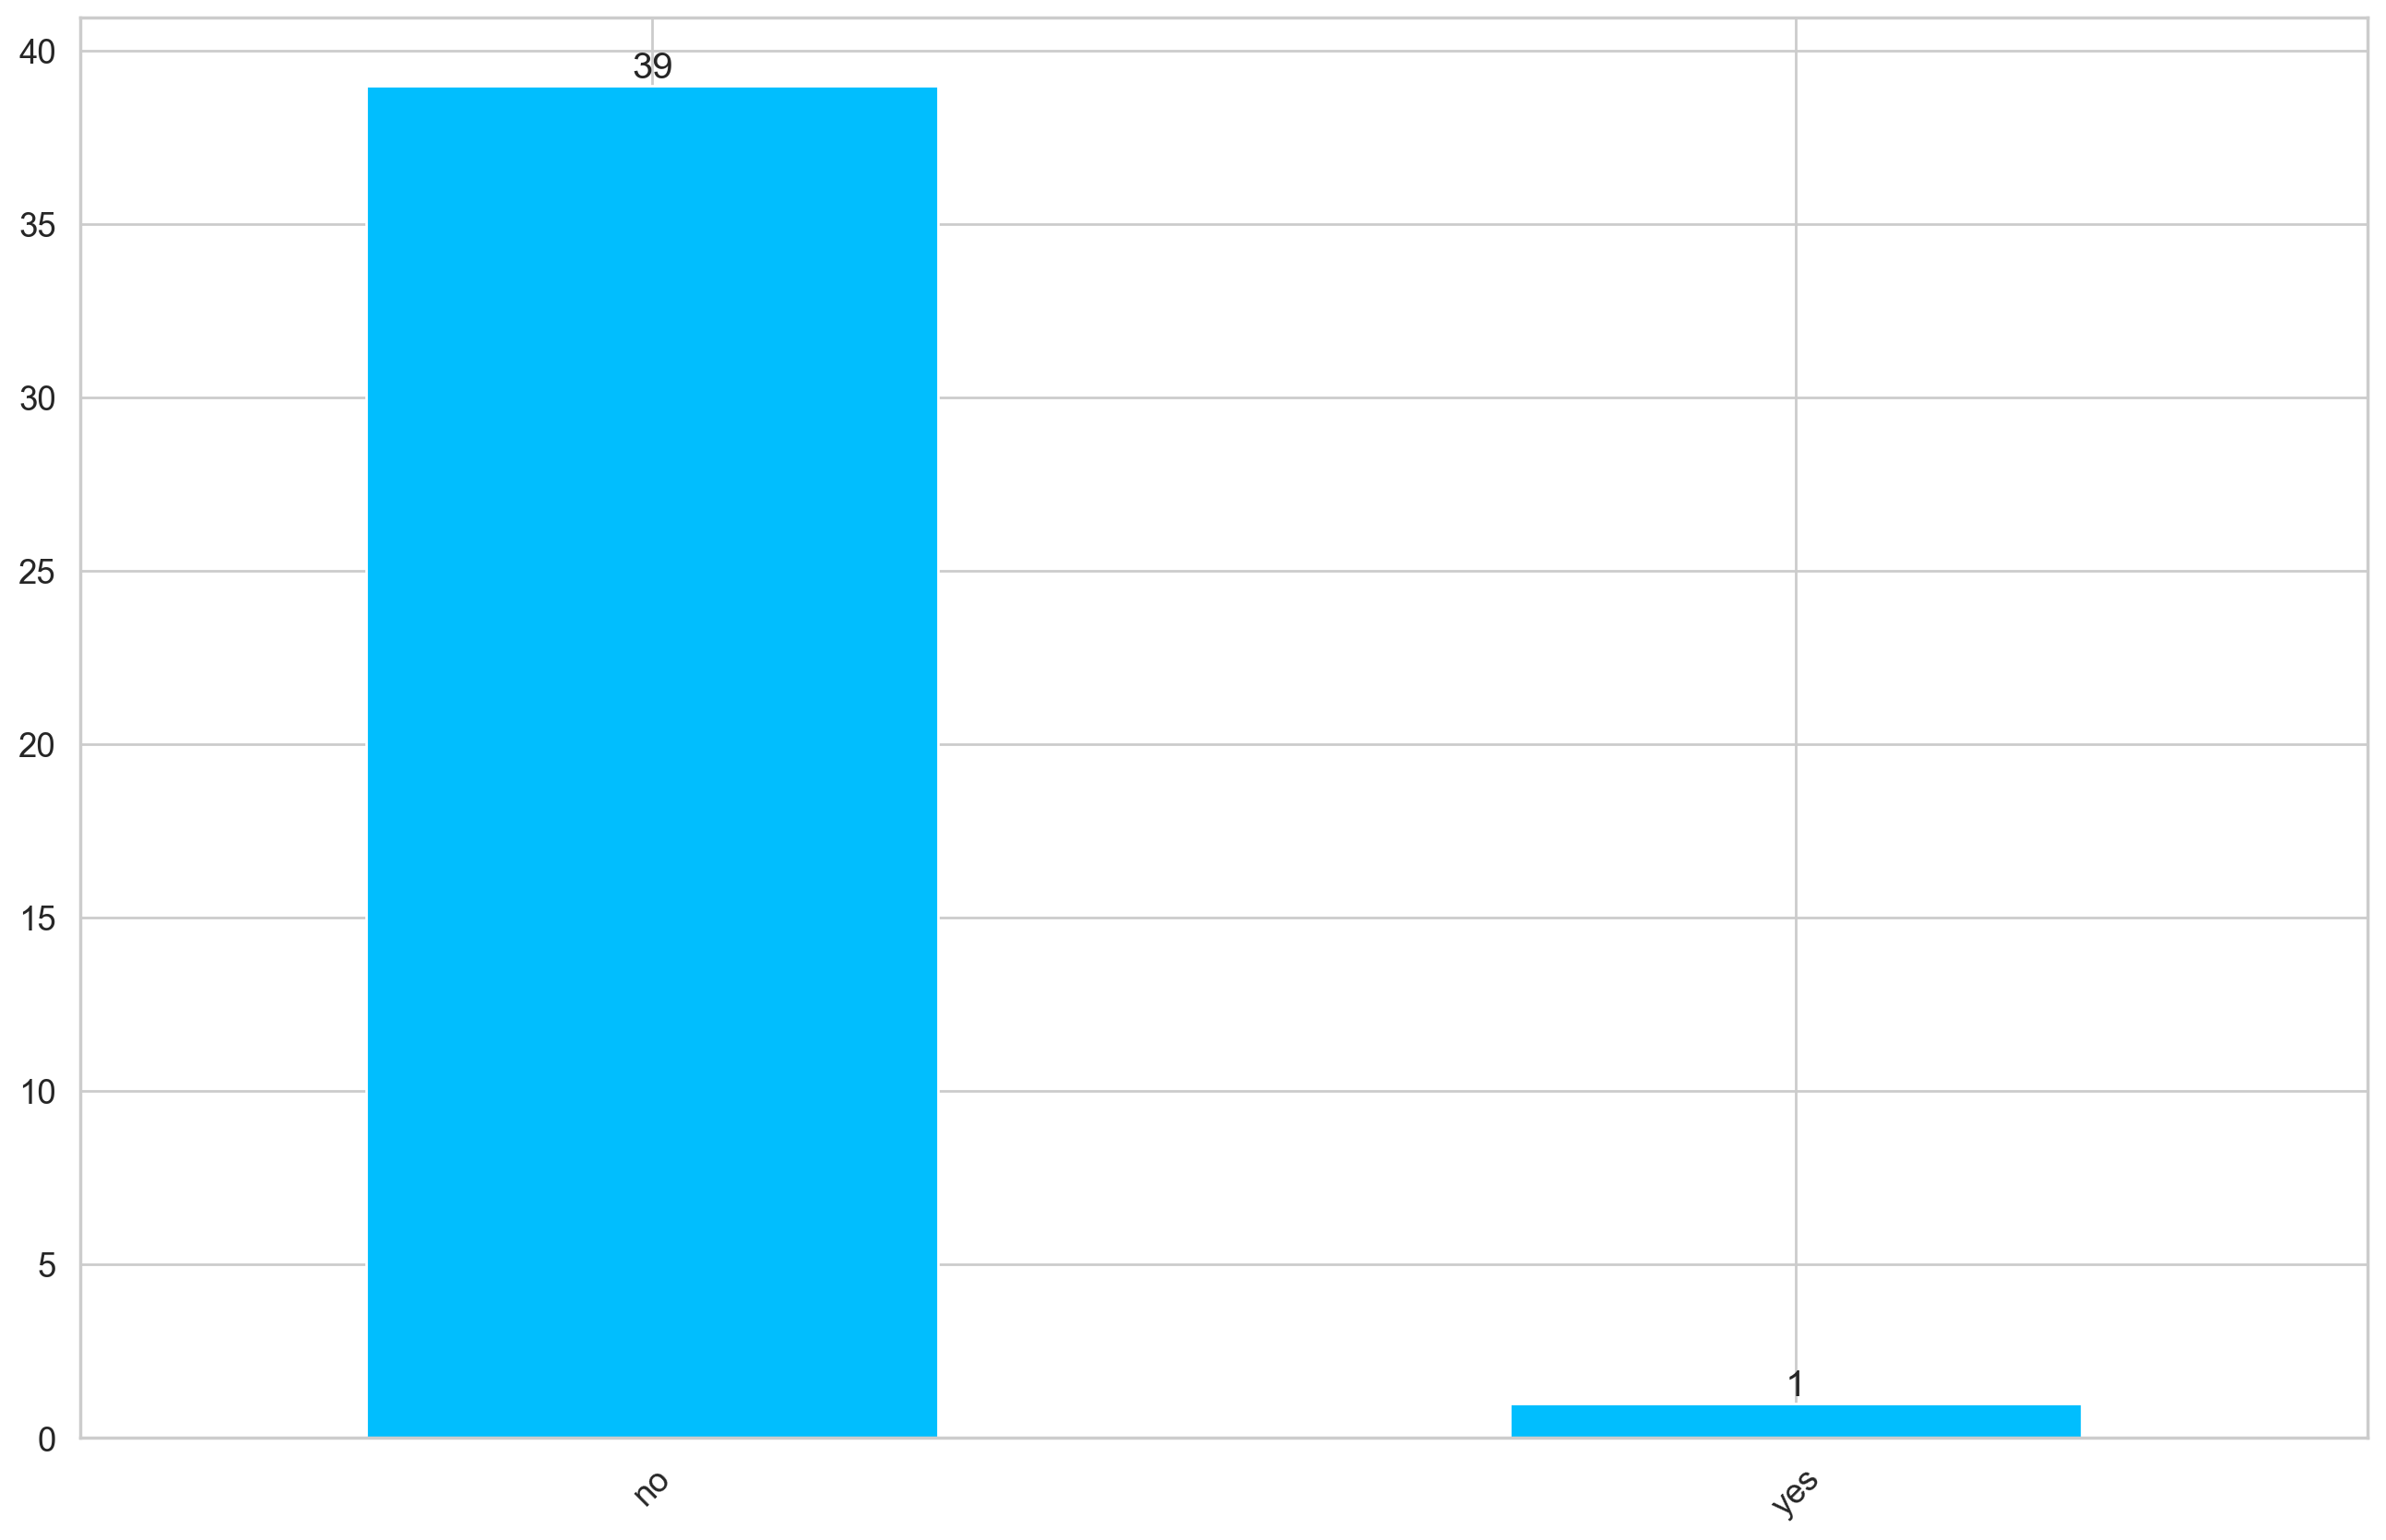

In [138]:
ay2 = used_segments_labels2.label.value_counts().plot(kind="bar")
# Add labels to the bars
for p in ay2.patches:
    ay2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

### Encoding the labels

In [142]:
encoded_labels2 = label_encoder.fit_transform(Y_train2.label)
encoded_labels2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [143]:
Y_train2["encoded_label"] = encoded_labels2
Y_train2

,Segment id,label,encoded_label
19,19,no,0
20,20,no,0
21,21,no,0
22,22,no,0
23,23,no,0
24,24,no,0
25,25,no,0
26,26,no,0
27,27,no,0
28,28,no,0


### Organaize data for training

In [144]:
# Merge the data and labels based on the 'series_id' column
merged_data2 = pd.merge(X_data2, Y_train2, on='Segment id')
merged_data2

,Segment id,EdaArousalMean [],label,encoded_label
0,19.0,2.315570e-02,no,0
1,19.0,1.803368e-02,no,0
2,19.0,1.404464e-02,no,0
3,19.0,1.093798e-02,no,0
4,19.0,8.518505e-03,no,0
...,...,...,...,...
795,58.0,7.216300e-16,no,0
796,58.0,5.620060e-16,no,0
797,58.0,4.376910e-16,no,0
798,58.0,3.408740e-16,no,0


In [148]:
# Extract the measuremens columns as time series data
X_custom2 = merged_data2.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_custom2

array([list([0.023155699, 0.018033676, 0.014044641, 0.010937978, 0.008518505, 0.006634219, 0.005166735, 0.004023857, 0.003133783, 0.002440593, 0.001900735, 0.001480294, 0.001152854, 0.000897844, 0.000699242, 0.00054457, 0.000424111, 0.000330298, 0.000257237, 0.000200336]),
       list([0.000156022, 0.00012151, 9.4632e-05, 7.36995e-05, 5.73972e-05, 4.4701e-05, 3.48132e-05, 2.71125e-05, 2.11153e-05, 1.64446e-05, 1.28071e-05, 9.97414e-06, 7.76787e-06, 6.04962e-06, 4.71145e-06, 3.66928e-06, 2.85764e-06, 2.22553e-06, 1.73325e-06, 1.34985e-06]),
       list([1.05127e-06, 8.18728e-07, 6.37626e-07, 4.96583e-07, 3.8674e-07, 3.01193e-07, 2.34569e-07, 1.82683e-07, 1.42274e-07, 1.10803e-07, 8.62933e-08, 6.72053e-08, 5.23395e-08, 0.015763245, 0.303056237, 0.245865009, 0.191479862, 0.149124666, 0.116138407, 0.090448682]),
       list([0.070441505, 0.054859899, 0.042724932, 0.033274211, 0.113932717, 0.128482878, 0.100062566, 0.077928805, 0.146857909, 0.166194591, 0.129432478, 0.150949921, 0.158337828

In [151]:
# Extract the 'label' column as labels
Y_custom2 = Y_train2["encoded_label"].values
Y_custom2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [152]:
# Convert X_custom to a 2D NumPy array
X_custom_np2 = np.vstack(X_custom2)
X_custom_np2

array([[2.31556990e-02, 1.80336760e-02, 1.40446410e-02, 1.09379780e-02,
        8.51850500e-03, 6.63421900e-03, 5.16673500e-03, 4.02385700e-03,
        3.13378300e-03, 2.44059300e-03, 1.90073500e-03, 1.48029400e-03,
        1.15285400e-03, 8.97844000e-04, 6.99242000e-04, 5.44570000e-04,
        4.24111000e-04, 3.30298000e-04, 2.57237000e-04, 2.00336000e-04],
       [1.56022000e-04, 1.21510000e-04, 9.46320000e-05, 7.36995000e-05,
        5.73972000e-05, 4.47010000e-05, 3.48132000e-05, 2.71125000e-05,
        2.11153000e-05, 1.64446000e-05, 1.28071000e-05, 9.97414000e-06,
        7.76787000e-06, 6.04962000e-06, 4.71145000e-06, 3.66928000e-06,
        2.85764000e-06, 2.22553000e-06, 1.73325000e-06, 1.34985000e-06],
       [1.05127000e-06, 8.18728000e-07, 6.37626000e-07, 4.96583000e-07,
        3.86740000e-07, 3.01193000e-07, 2.34569000e-07, 1.82683000e-07,
        1.42274000e-07, 1.10803000e-07, 8.62933000e-08, 6.72053000e-08,
        5.23395000e-08, 1.57632450e-02, 3.03056237e-01, 2.4586

# Train and save model

## Lior's experiment 1 data

In [110]:
# Create and train the RocketClassifier
clf = RocketClassifier(num_kernels=500)
clf.fit(X_custom_np, Y_custom)

RocketClassifier(num_kernels=500)

In [122]:
# Specify the directory and filename where you want to save the model
save_directory = './model/'
model_filename = 'eda_rocket_model.pkl'

# Combine the directory and filename to create the full file path
full_model_path = os.path.join(save_directory, model_filename)

# Save the trained model to the specified directory
joblib.dump(clf, full_model_path)

['./model/eda_rocket_model.pkl']

## Lior's experiment 2 data

In [100]:
# Load the modle that was trained on Lior's 1st experiment data
clf1 = joblib.load("./model/eda_rocket_model.pkl")

In [101]:
# Re-train the model
clf1.fit(X_custom_np1, Y_custom1)

RocketClassifier(num_kernels=500)

In [103]:
# Specify the directory and filename where you want to save the model
save_directory = './model/'
model_filename = 'eda_rocket_model1.pkl'

# Combine the directory and filename to create the full file path
full_model_path = os.path.join(save_directory, model_filename)

# Save the trained model to the specified directory
joblib.dump(clf1, full_model_path)

['./model/eda_rocket_model1.pkl']

## Vlad's experiment 1 data

In [155]:
# Load the modle that was trained on Lior's 1st and 2nd experiment data
clf2 = joblib.load("./model/eda_rocket_model1.pkl")

In [156]:
# Re-train the model
clf2.fit(X_custom_np2, Y_custom2)

RocketClassifier(num_kernels=500)

In [157]:
# Specify the directory and filename where you want to save the model
save_directory = './model/'
model_filename = 'eda_rocket_model2.pkl'

# Combine the directory and filename to create the full file path
full_model_path = os.path.join(save_directory, model_filename)

# Save the trained model to the specified directory
joblib.dump(clf2, full_model_path)

['./model/eda_rocket_model2.pkl']

# Load and test model

## Organaize data for testing

In [160]:
test_data = pd.read_csv("test_data/EDA_vlad_2_results.csv")
test_data = test_data[60:880]
test_data

,Time rel [s],Day rel [d],Time rel [hh:mm:ss],Date abs [yyyy-mm-dd],Time abs [hh:mm:ss],ActivityClass [],Altitude [m],BodyPosition [],EdaArousalMean [],EdaSclMean [uS],...,InclinationForward [deg],InclinationRight [deg],MovementAcceleration [g],NonWearTime [],StepCount [steps],TempMean [],VerticalSpeed [m/s],temp [Grad Celsius],Marker,Segment id
60,60,0,00:01:00,2023-07-11,17:26:01,2,100.536476,5,0.427687,9.062784,...,87.766423,37.166398,0.227796,0,1,27.7,-0.020075,27.7,NaN,3
61,61,0,00:01:01,2023-07-11,17:26:02,2,100.509342,5,0.333083,9.143783,...,87.766423,37.166398,0.278153,0,2,27.7,-0.017381,27.7,NaN,3
62,62,0,00:01:02,2023-07-11,17:26:03,2,100.458276,5,0.259405,9.148984,...,87.766423,37.166398,0.210692,0,0,27.7,-0.013896,27.7,Mark - Start,3
63,63,0,00:01:03,2023-07-11,17:26:04,2,100.394854,5,0.202025,9.050531,...,87.766423,37.166398,0.304300,0,1,27.7,-0.010250,27.7,NaN,3
64,64,0,00:01:04,2023-07-11,17:26:05,2,100.343395,5,0.497035,8.671568,...,107.638195,42.669686,0.224496,0,0,27.7,-0.006618,27.7,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,875,0,00:14:35,2023-07-11,17:39:36,1,102.786522,2,0.001763,7.564490,...,112.253360,23.744604,0.010406,0,0,29.3,0.011734,29.3,NaN,43
876,876,0,00:14:36,2023-07-11,17:39:37,1,102.772806,2,0.001373,7.541065,...,111.985071,23.421598,0.008280,0,0,29.3,0.012667,29.3,NaN,43
877,877,0,00:14:37,2023-07-11,17:39:38,1,102.765797,2,0.001069,7.527106,...,111.985071,23.421598,0.006656,0,0,29.3,0.013976,29.3,NaN,43
878,878,0,00:14:38,2023-07-11,17:39:39,1,102.770840,2,0.000833,7.525796,...,111.985071,23.421598,0.007316,0,0,29.3,0.015057,29.3,NaN,43


In [162]:
Y_test = pd.read_csv("test_data/EDA_vlad_2.csv")
Y_test = Y_test[3:44]
Y_test

,Segment id,label
3,3,no
4,4,no
5,5,no
6,6,no
7,7,no
8,8,no
9,9,no
10,10,no
11,11,no
12,12,no


In [165]:
# Get the real labels of the testing data
test_encoded_labels = label_encoder.fit_transform(Y_test.label)
test_encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [166]:
Y_test["encoded_label"] = test_encoded_labels
Y_test

,Segment id,label,encoded_label
3,3,no,0
4,4,no,0
5,5,no,0
6,6,no,0
7,7,no,0
8,8,no,0
9,9,no,0
10,10,no,0
11,11,no,0
12,12,no,0


In [167]:
# Extract the measuremens columns as time series data
X_test = test_data.groupby('Segment id')['EdaArousalMean []'].apply(list).values
X_test_np = np.vstack(X_test)
X_test_np

array([[4.27687084e-01, 3.33083036e-01, 2.59405329e-01, 2.02025074e-01,
        4.97034597e-01, 6.81649580e-01, 5.30869227e-01, 4.13441369e-01,
        3.21988462e-01, 2.50764867e-01, 1.95295874e-01, 1.52096580e-01,
        1.18452936e-01, 9.22512390e-02, 7.18453370e-02, 5.59532050e-02,
        4.35764000e-02, 3.39373340e-02, 2.64304220e-02, 2.05840340e-02],
       [1.60308620e-02, 1.24848480e-02, 9.72320900e-03, 7.57244300e-03,
        5.89742400e-03, 4.59291900e-03, 3.57696900e-03, 2.78574600e-03,
        2.16954100e-03, 1.68964000e-03, 1.31589300e-03, 1.02481900e-03,
        7.98130000e-04, 6.21584000e-04, 4.84090000e-04, 3.77010000e-04,
        2.93615000e-04, 2.28668000e-04, 1.78087000e-04, 1.38694000e-04],
       [1.08015000e-04, 8.41222000e-05, 6.55145000e-05, 5.10227000e-05,
        3.97365000e-05, 3.09468000e-05, 2.41014000e-05, 1.87702000e-05,
        8.62759539e-01, 1.17398173e+00, 9.14297890e-01, 7.12055913e-01,
        5.54549703e-01, 4.31883743e-01, 3.36351397e-01, 4.0019

## Test Lior exp 1 model

In [168]:
# Load the model that is trained only on Lior's 1st experiment data
loaded_clf = joblib.load("./model/eda_rocket_model.pkl")

In [169]:
# Predict labels for the test data
y_pred = loaded_clf.predict(X_test_np)
# Print predictions
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [170]:
# Calculate accuracy of the model on Vlad's 2nd experiment data
accuracy = accuracy_score(test_encoded_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.49%


## Test Lior exp 1+2 model

In [171]:
# Load the model that is trained on Lior's 1st and 2nd experiments data
loaded_clf1 = joblib.load("./model/eda_rocket_model1.pkl")

In [172]:
# Predict labels for the test data
y_pred1 = loaded_clf1.predict(X_test_np)
# Print predictions
y_pred1

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [173]:
# Calculate accuracy of the model on Vlad's 2nd experiment data
accuracy1 = accuracy_score(test_encoded_labels, y_pred1)
print(f"Accuracy: {accuracy1 * 100:.2f}%")

Accuracy: 70.73%


## Test Lior exp 1+2 and Vlad exp 1 model

In [174]:
# Load the model that is trained on Lior's 1st and 2nd experiments and Vlad's 1s experiment data
loaded_clf2 = joblib.load("./model/eda_rocket_model2.pkl")

In [175]:
# Predict labels for the test data
y_pred2 = loaded_clf2.predict(X_test_np)
# Print predictions
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [176]:
# Calculate accuracy of the model on Vlad's 2nd experiment data
accuracy2 = accuracy_score(test_encoded_labels, y_pred2)
print(f"Accuracy: {accuracy2 * 100:.2f}%")

Accuracy: 95.12%
